In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

In [122]:
df = pd.read_excel('D:\master\IDAT7215\project\Earthquake Damage Data.xlsx', 'Data')
df.head()



<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\23318\AppData\Local\Temp\ipykernel_772\3580528627.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_excel('D:\master\IDAT7215\project\Earthquake Damage Data.xlsx', 'Data')


,ID,P1,P2,P3,P4,P5,P6,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,DS
0,1,0.733800,0.588313,0.824660,0.420993,0.00,0.599542,0.257812,0,0.0,0,0.8,1.0,0.000000,0.827586,4
1,2,0.738113,0.604497,0.477239,0.252442,0.75,0.544622,0.148438,0,0.0,1,0.8,1.0,0.666667,0.931034,1
2,3,0.742815,0.602485,0.755395,0.434462,0.75,0.560641,0.093750,1,1.0,1,0.8,1.0,0.000000,0.655172,1
3,4,0.739635,0.602389,0.768629,0.484940,0.75,0.556064,0.148438,0,0.0,0,0.8,1.0,0.000000,0.965517,1
4,5,0.740052,0.605121,0.783227,0.486592,0.75,0.542334,0.148438,0,0.0,1,0.8,0.5,0.666667,0.931034,1


In [123]:
df.describe()

,ID,P1,P2,P3,P4,P5,P6,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,DS
count,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000,30590.000000
mean,15303.026022,0.484802,0.476904,0.874613,0.484374,0.093985,0.673838,0.258939,0.503923,0.101553,0.102223,0.713848,0.507225,0.121401,0.912814,1.269892
std,8834.572835,0.171426,0.128255,0.101429,0.184622,0.247766,0.121076,0.155857,0.499993,0.242632,0.302946,0.187869,0.367330,0.274708,0.089250,0.846671
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7652.250000,0.358557,0.400998,0.846477,0.387241,0.000000,0.615561,0.117188,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.862069,1.000000
50%,15306.500000,0.461833,0.475270,0.902231,0.489988,0.000000,0.691076,0.265625,1.000000,0.000000,0.000000,0.800000,0.500000,0.000000,0.931034,1.000000
75%,22953.750000,0.588331,0.562188,0.931199,0.578019,0.000000,0.757437,0.382812,1.000000,0.000000,0.000000,0.800000,1.000000,0.000000,1.000000,1.000000
max,30602.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [124]:
df.isna().sum()

ID     0
P1     0
P2     0
P3     0
P4     0
P5     0
P6     0
BC1    0
BC2    0
BC3    0
BC4    0
BC5    0
BC6    0
BC7    0
BC8    0
DS     0
dtype: int64

<Axes: xlabel='DS', ylabel='count'>

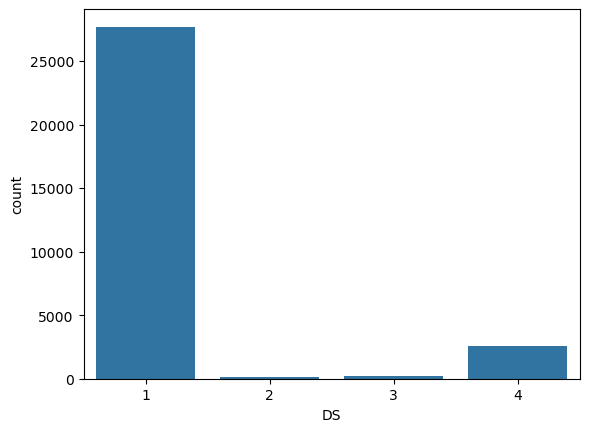

In [125]:

sns.countplot(x='DS', data=df)# the layout of the output 

In [126]:
p_columns = [f'P{i}' for i in range(1, 7)]
bc_columns = [f'BC{i}' for i in range(1, 9)]
X=df[p_columns+bc_columns]
y=df['DS']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=209)#split the data into training and testing data

In [127]:
# training the model
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)


SVC(kernel='linear')

In [128]:
pred = model.predict(x_test)

In [129]:
# 计算准确率
print("Accuracy:", metrics.accuracy_score(y_test, pred))

# 计算精确率（多分类）
print("Precision (macro):", metrics.precision_score(y_test, pred, average='macro'))

# 计算召回率（多分类）
print("Recall (macro):", metrics.recall_score(y_test, pred, average='macro'))

# 计算 F1 分数（多分类）
print("F1 Score (macro):", metrics.f1_score(y_test, pred, average='macro'))

# 打印分类报告
print(metrics.classification_report(y_test, pred))

Accuracy: 0.9013566525008173
Precision (macro): 0.22533916312520433
Recall (macro): 0.25
F1 Score (macro): 0.23702987320008598
              precision    recall  f1-score   support

           1       0.90      1.00      0.95     11029
           2       0.00      0.00      0.00        56
           3       0.00      0.00      0.00        80
           4       0.00      0.00      0.00      1071

    accuracy                           0.90     12236
   macro avg       0.23      0.25      0.24     12236
weighted avg       0.81      0.90      0.85     12236



d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: Undefine